<a href="https://colab.research.google.com/github/BhojRajBist/BhojRajBist/blob/main/GridSheet_in_nepal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

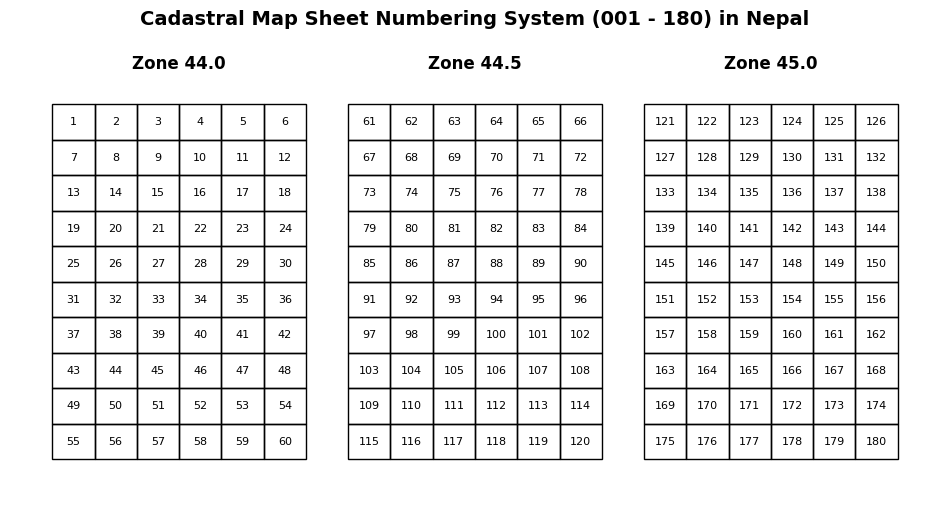

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define grid size and parameters
zones = 3  # Three zones (44.0, 44.5, 45.0)
sheets_per_zone = 60  # Number of sheets in each zone
total_sheets = zones * sheets_per_zone  # 180 sheets in total

# Create a grid layout
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the grid
rows = 10  # Number of rows
cols = 6   # Number of columns per zone
for z in range(zones):
    for i in range(rows):
        for j in range(cols):
            sheet_number = z * sheets_per_zone + i * cols + j + 1
            x = j + (z * (cols + 1))  # Offset for different zones
            y = rows - i  # Reverse order for proper numbering
            ax.text(x + 0.5, y - 0.5, str(sheet_number), fontsize=8, ha='center', va='center', color='black')
            ax.add_patch(plt.Rectangle((x, y - 1), 1, 1, fill=False, edgecolor='black'))

# Labels for zones
for z in range(zones):
    x_center = z * (cols + 1) + cols / 2
    ax.text(x_center, rows + 1, f"Zone {44 + (z * 0.5)}", fontsize=12, ha='center', fontweight='bold')

# Adjust plot settings
ax.set_xlim(-1, zones * (cols + 1))
ax.set_ylim(-1, rows + 2)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Show plot
plt.title("Cadastral Map Sheet Numbering System (001 - 180) in Nepal", fontsize=14, fontweight='bold')
plt.show()


In [ ]:
import folium

def plot_grid_on_map(map, sheet_number, zone, color):
    latitude, longitude = calculate_grid_coordinates(sheet_number, zone)
    north_sheet_number, south_sheet_number, east_sheet_number, west_sheet_number = calculate_neighboring_sheets(sheet_number, zone)

    # Plot main sheet
    folium.Rectangle(
        bounds=[[latitude - 0.05, longitude - 0.05], [latitude + 0.05, longitude + 0.05]],
        color=color, fill=True
    ).add_to(map)
    folium.Marker([latitude, longitude], popup=f"Sheet {sheet_number}").add_to(map)

    # Plot neighboring sheets
    if north_sheet_number is not None:
        north_latitude, north_longitude = calculate_grid_coordinates(north_sheet_number, zone)
        folium.Rectangle(
            bounds=[[north_latitude - 0.05, north_longitude - 0.05], [north_latitude + 0.05, north_longitude + 0.05]],
            color=color, fill=True
        ).add_to(map)
        folium.Marker([north_latitude, north_longitude], popup=f"Sheet {north_sheet_number}").add_to(map)

    if south_sheet_number is not None:
        south_latitude, south_longitude = calculate_grid_coordinates(south_sheet_number, zone)
        folium.Rectangle(
            bounds=[[south_latitude - 0.05, south_longitude - 0.05], [south_latitude + 0.05, south_longitude + 0.05]],
            color=color, fill=True
        ).add_to(map)
        folium.Marker([south_latitude, south_longitude], popup=f"Sheet {south_sheet_number}").add_to(map)

    if east_sheet_number is not None:
        east_latitude, east_longitude = calculate_grid_coordinates(east_sheet_number, zone)
        folium.Rectangle(
            bounds=[[east_latitude - 0.05, east_longitude - 0.05], [east_latitude + 0.05, east_longitude + 0.05]],
            color=color, fill=True
        ).add_to(map)
        folium.Marker([east_latitude, east_longitude], popup=f"Sheet {east_sheet_number}").add_to(map)

    if west_sheet_number is not None:
        west_latitude, west_longitude = calculate_grid_coordinates(west_sheet_number, zone)
        folium.Rectangle(
            bounds=[[west_latitude - 0.05, west_longitude - 0.05], [west_latitude + 0.05, west_longitude + 0.05]],
            color=color, fill=True
        ).add_to(map)
        folium.Marker([west_latitude, west_longitude], popup=f"Sheet {west_sheet_number}").add_to(map)
